# Gender and age recognition from files

## Data
The data we work with is called "common voice data", first we will look at the CSV file containing information about
the voice files + some basic attributes, upvotes downvotes (we will not need this) gender and age.

## Importing the data

In [2]:
# import the required packages
import pandas as pd
df = pd.read_csv("cv-valid-train.csv")

## Preprocessing data
As we can see there are a number of empty columns, we won't be able to detect the gender without the source information
therefore where the gender column is missing the data will be dropped.

In [3]:
#Identify where gender and age are missing
print(f'This is the length of the dataframe {len(df)}')
null_num = len(df.loc[(pd.isnull(df.gender) & pd.isnull(df.age))])
not_null = len(df.loc[~(pd.isnull(df.gender) & pd.isnull(df.age))])
print(f'This is the length of of rows where both columns are null {not_null}')
print(f'This is the sum of the two should be the length of the df {not_null+null_num}')
# this is just to make sure we negated the the df.gender and df.age not null correctly
valid_df = df.loc[~(pd.isnull(df.gender) & pd.isnull(df.age))]
valid_df.reset_index(inplace=True)
valid_df

This is the length of the dataframe 195776
This is the length of of rows where both columns are null 74361
This is the sum of the two should be the length of the df 195776


,index,filename,text,up_votes,down_votes,age,gender,accent,duration
0,5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
1,8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
2,13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
3,14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
4,19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN
...,...,...,...,...,...,...,...,...,...
74356,195766,cv-valid-train/sample-195766.mp3,but before i go i want to tell you a little story,1,0,fourties,male,england,NaN
74357,195767,cv-valid-train/sample-195767.mp3,down below in the darkness were hundreds of pe...,3,0,thirties,female,us,NaN
74358,195770,cv-valid-train/sample-195770.mp3,he heard a muffled grating sound and saw the b...,4,0,twenties,male,england,NaN
74359,195771,cv-valid-train/sample-195771.mp3,the englishman said nothing,1,0,thirties,male,england,NaN


Now in a variable we stored valid_df which doesn't contain any missing data, now it is time to collect information on
the voice dataset

# The voice dataset & Feature extraction
Saved in mp3 format we will use a package called librosa to look at the data.
There are a number of complex features that we can extract from the data

* **Spectral centroid** - this takes samples of the recordings using Fourier Transform
the transformation decomposes the waveform of a musical chord into terms of the intensity of its constituent pitches.
The easy way to understand this variable is to imagine a weighted average on the audio file depending on the intensity of high
vs low pitches. This will play a key role in detecting whether this is a male or female.
* **Spectral Bandwidth** is the difference between the upper and lower frequencies in a continuous band of frequencies.
As we know the signals oscillate about a point so if the point is the centroid of the signal then the sum of
maximum deviation of the signal on both sides of the point can be considered as the bandwidth of the signal
at that time frame
* **Spectral roll-off** It can be defined as the action of a specific type of
filter which is designed to roll off the frequencies outside to a specific range. The reason we call
it roll-off is because it is a gradual procedure.
There can be two kinds of filters: hi-pass and low pass and both can roll off the frequency from a signal
going outside of their range.
* **Tonnetz** ?
* **MFCC**
## TO DO
?? let's see if there is more to add to this and also to clarify these


In [4]:
# Writing a function its sole purpose will be to read in an audio file and extract the features mentioned above
import librosa
import os
import errno
import numpy as np

In [5]:
def import_mp3file(path:str, file_name:str, spectral_centroid:bool=True, spectral_bandwidth:bool=True,
                   spectral_roll_off:bool=True, MFCC:bool=True) -> dict:
    """
    :param path: path to the file
    :param file_name: name of the file
    :param spectral_centroid: if true spectral centroid is in the output
    :param spectral_bandwidth: if true spectral bandwidth is in the output
    :param spectral_roll_off: if true roll_off is in the output
    :param MFCC: if true MFCC values are in the output
    :return: filename + dictionary with feature set
    """
    if os.path.isfile(os.path.join(path, file_name)):
        audio, _ = librosa.load(os.path.join(path, file_name))
        output = dict()
        output['filename'] = file_name
        if spectral_centroid:
            spectral_centroid_value = np.mean(librosa.feature.spectral_centroid(y=audio))
            output["spectral_centroid"] = spectral_centroid_value
        if spectral_bandwidth:
            spectral_bandwidth_value = np.mean(librosa.feature.spectral_bandwidth(y=audio))
            output["spectral_bandwidth"] = spectral_bandwidth_value
        if spectral_roll_off:
            spectral_roll_off_value = np.mean(librosa.feature.spectral_rolloff(y=audio))
            output["spectral_rolloff"] = spectral_roll_off_value
        if MFCC:
            MFCC_values = librosa.feature.mfcc(y=audio)
            for i, element in enumerate(MFCC_values):
                output[f'MFCC_{i}'] = np.mean(element)
        return output

    else:
        raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), os.path.join(path,file_name))


In [6]:
#Testing the function - for the errors there is no test for now
path = "./cv-valid-train/"
file_name = valid_df.filename.iloc[1]
test_dict = import_mp3file(path, file_name)
print(test_dict)


c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


{'filename': 'cv-valid-train/sample-000008.mp3', 'spectral_centroid': 2352.7475565141926, 'spectral_bandwidth': 1854.9463106224644, 'spectral_rolloff': 3968.712890625, 'MFCC_0': -415.57288, 'MFCC_1': 99.58028, 'MFCC_2': -27.460777, 'MFCC_3': 10.333393, 'MFCC_4': 7.2848096, 'MFCC_5': 0.9885974, 'MFCC_6': -22.434021, 'MFCC_7': -21.395174, 'MFCC_8': -16.391228, 'MFCC_9': -7.847973, 'MFCC_10': 0.43195435, 'MFCC_11': 5.885935, 'MFCC_12': -7.2544622, 'MFCC_13': -3.529506, 'MFCC_14': -13.423277, 'MFCC_15': -1.1738807, 'MFCC_16': -7.1814423, 'MFCC_17': 5.562098, 'MFCC_18': -6.6943316, 'MFCC_19': -1.178298}


c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


array([[4460.22175571, 4175.59117068, 3884.60612779, 3374.71829314,
        1144.64655545, 1092.94004371, 1225.65807209, 1266.59594119,
        1232.85026572, 2744.17641222, 4105.00095856, 3749.85456925,
        2332.4429962 , 1651.9227578 , 1553.81723776, 1566.04631018,
        1544.57575462, 1525.91524213, 1576.66014615, 1929.20321356,
        2672.19538181, 2476.3592423 , 1755.23655177, 1611.70976292,
        1461.32540332, 1352.79000052, 1454.62261381, 1340.39012086,
         992.77723306, 1032.26490225, 1148.66817526, 1296.14941814,
        1427.50061457, 1517.80837736, 1472.37735089, 1393.89724893,
        1313.14088119, 1256.17061522, 1163.08342939, 1063.48420999,
         999.93926298, 1031.49493118, 1117.12346428, 1254.74466627,
        1398.78795777, 1528.87036282, 1578.40015717, 1771.66304659,
        3543.62932697, 4743.56534655, 5102.61070267, 5170.89100393,
        5356.37322273, 5557.71014968, 5510.2354996 , 2655.50800088,
        1599.98330424, 1449.93721998, 1466.37987

<Figure size 1600x1120 with 0 Axes>

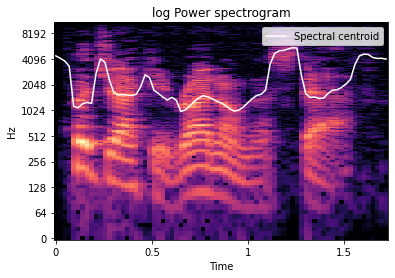

In [7]:
# This is just here to play around with the central spectroid data, see the frequency bins and the averages over time
import matplotlib.pyplot as plt
import librosa.display


audio, _ = librosa.load(os.path.join(path, file_name))
x = librosa.feature.spectral_centroid(y=audio, win_length=2048*1, n_fft=2048*1)
S, phase = librosa.magphase(librosa.stft(y=audio))
plt.figure(figsize=(20, 14), dpi=80)
times = librosa.times_like(x)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, x.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

librosa.feature.spectral_centroid(S=S)


## Finally let's build a dataset with the extracted features



In [88]:
# Unfortunately it takes sime to extract these values therefore instead of running it for the whole dataset let's export
# a few records - and to make sure it is a balanced dataset
# if the file has already been extracted
if not os.path.isfile("./cleaned_training_data.csv"):
    print(valid_df.loc[valid_df.gender=="female"].groupby("age").count())
    # There is very few data from eighties and a lot more from younger ppl, let's try to grab 200 records from each category
    unique_ages = list(valid_df.age.unique())
    unique_ages.remove(np.nan)
    print(f'unique ages: {unique_ages}')

    sampled_df = pd.DataFrame()
    for age_group in unique_ages:
       temp_df = pd.DataFrame()
       temp_df = valid_df.loc[(valid_df.gender=="female") & (valid_df.age==age_group)].copy()
       sampled_df = sampled_df.append(temp_df[:400])

    for age_group in unique_ages:
       temp_df = pd.DataFrame()
       temp_df = valid_df.loc[(valid_df.gender=="male") & (valid_df.age==age_group)].copy()
       sampled_df = sampled_df.append(temp_df[:400])

    sampled_df.to_csv("cleaned_training_data.csv", index=False)

else:
    sampled_df = pd.read_csv("./cleaned_training_data.csv")

           index  filename  text  up_votes  down_votes  gender  accent  \
age                                                                      
eighties      18        18    18        18          18      18      18   
fifties     4467      4467  4467      4467        4467    4467    4019   
fourties    2187      2187  2187      2187        2187    2187    2031   
seventies    130       130   130       130         130     130     129   
sixties     1722      1722  1722      1722        1722    1722    1691   
teens       1060      1060  1060      1060        1060    1060     938   
thirties    4560      4560  4560      4560        4560    4560    4318   
twenties    3955      3955  3955      3955        3955    3955    3275   

           duration  
age                  
eighties          0  
fifties           0  
fourties          0  
seventies         0  
sixties           0  
teens             0  
thirties          0  
twenties          0  
unique ages: ['twenties', 'seventies', 

C:\Users\ASemjen\AppData\Local\Temp\ipykernel_26652\226188933.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(temp_df[:400])
C:\Users\ASemjen\AppData\Local\Temp\ipykernel_26652\226188933.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(temp_df[:400])
C:\Users\ASemjen\AppData\Local\Temp\ipykernel_26652\226188933.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(temp_df[:400])
C:\Users\ASemjen\AppData\Local\Temp\ipykernel_26652\226188933.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(temp_df[:400])


In [89]:
sampled_df

,index,filename,text,up_votes,down_votes,age,gender,accent,duration
0,5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
7,26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia,NaN
23,59,cv-valid-train/sample-000059.mp3,finally a young woman approached who was not d...,3,0,twenties,female,us,NaN
36,101,cv-valid-train/sample-000101.mp3,the fumes from the traffic was unbearable,2,0,twenties,female,NaN,NaN
53,155,cv-valid-train/sample-000155.mp3,let him have everything he wants,1,0,twenties,female,england,NaN
...,...,...,...,...,...,...,...,...,...
72799,191708,cv-valid-train/sample-191708.mp3,wait till martha hears about this,2,0,eighties,male,australia,NaN
72826,191778,cv-valid-train/sample-191778.mp3,you know where she lives,1,0,eighties,male,australia,NaN
73016,192279,cv-valid-train/sample-192279.mp3,picking up where he left off she finished the ...,1,0,eighties,male,australia,NaN
73323,193063,cv-valid-train/sample-193063.mp3,the congestion was heavy throughout the city,1,0,eighties,male,us,NaN


In [90]:
# if the training set has already been generated don't run this again - anyways this takes a pretty long time to extract
if not os.path.isfile("./recording_features.csv"):
    files = sampled_df.filename.to_list()
    features = []
    for i, filename in enumerate(files):
        recording_feature = import_mp3file(path, filename)
        features.append(recording_feature)
        if i % 100 == 0:
            print(f'Processed {i} records')

    final = pd.DataFrame(features)
    final.to_csv("recording_features.csv")
else:
    final = pd.read_csv("recording_features.csv")

c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Processed 0 records
Processed 100 records
Processed 200 records
Processed 300 records
Processed 400 records
Processed 500 records
Processed 600 records
Processed 700 records
Processed 800 records
Processed 900 records
Processed 1000 records
Processed 1100 records
Processed 1200 records
Processed 1300 records
Processed 1400 records
Processed 1500 records
Processed 1600 records
Processed 1700 records
Processed 1800 records
Processed 1900 records
Processed 2000 records
Processed 2100 records
Processed 2200 records
Processed 2300 records
Processed 2400 records
Processed 2500 records
Processed 2600 records
Processed 2700 records
Processed 2800 records
Processed 2900 records
Processed 3000 records
Processed 3100 records
Processed 3200 records
Processed 3300 records
Processed 3400 records
Processed 3500 records
Processed 3600 records
Processed 3700 records
Processed 3800 records
Processed 3900 records
Processed 4000 records
Processed 4100 records
Processed 4200 records
Processed 4300 records


## Joining the two dataframes and standardizing the data


In [91]:
#time to remove columns we don't need
sampled_df = sampled_df.drop(columns=["up_votes", "down_votes", "duration", "accent", "index","text"])

In [145]:
# merge the two dataframes so we have the outcomes labels with the data
merged = pd.merge(sampled_df, final, on="filename")
merged

,filename,age,gender,spectral_centroid,spectral_bandwidth,spectral_rolloff,MFCC_0,MFCC_1,MFCC_2,MFCC_3,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,cv-valid-train/sample-000005.mp3,twenties,female,1826.676487,1881.513079,3860.168457,-576.315369,86.375450,11.824992,49.361706,...,-14.482080,-13.578614,-6.720922,-6.186287,-4.839533,-9.007957,-3.113982,-1.743871,-9.447196,-8.065145
1,cv-valid-train/sample-000026.mp3,twenties,female,2616.617405,2179.803059,4761.842524,-228.240372,82.801941,-8.383657,30.143246,...,-4.622561,-2.331251,-6.204039,3.251125,-17.747442,-0.515065,-10.605970,-8.131491,-8.427092,3.234301
2,cv-valid-train/sample-000059.mp3,twenties,female,2631.967942,2044.362034,4626.430442,-356.876740,68.245125,-10.347807,12.065706,...,-7.054412,-6.034971,-8.058039,-13.018083,-11.938354,3.690609,-8.656282,2.081685,-1.077340,-10.969205
3,cv-valid-train/sample-000101.mp3,twenties,female,2102.693066,1761.210243,3696.558838,-620.414307,95.137268,-1.270926,22.470818,...,-14.900973,-17.381929,-8.984969,-7.450493,-7.771703,-7.896185,-9.588766,-11.281025,-8.105808,-1.190835
4,cv-valid-train/sample-000155.mp3,twenties,female,2238.837714,2250.816026,4440.932155,-383.868896,111.190483,9.153431,14.111599,...,-11.278584,-4.409180,-8.951644,-4.352331,-16.304008,-1.139749,-7.554811,-5.609372,-11.100672,0.755369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,cv-valid-train/sample-191708.mp3,eighties,male,2803.638060,2400.511082,5323.456971,-269.259979,82.796638,12.752720,27.175756,...,-6.123298,1.858352,-5.315768,1.561501,-6.472857,6.164400,-7.462326,4.084486,-4.659536,-1.608125
5565,cv-valid-train/sample-191778.mp3,eighties,male,3061.619889,2465.107380,5817.553711,-282.468384,66.788048,6.144638,32.600498,...,-7.412391,-2.310144,-4.216847,1.398168,-3.506517,3.998086,-7.521873,3.641059,-1.560491,-2.203190
5566,cv-valid-train/sample-192279.mp3,eighties,male,2557.236116,2303.468228,4938.077337,-249.214844,84.716560,12.915024,37.721024,...,-6.736383,1.836847,-7.842829,3.800439,-4.652071,3.492043,-6.001388,2.983396,-6.588633,-3.076507
5567,cv-valid-train/sample-193063.mp3,eighties,male,2926.217222,1967.799889,5121.836600,-410.204376,45.573013,-13.197499,31.024557,...,-8.259255,-8.094961,-0.630357,-6.007699,-1.901966,-5.949671,-1.648061,-4.496528,-3.694201,-0.237607


In [147]:
# switching female and male into 0 and 1
merged['gender_num'] = merged.gender.apply(lambda a : 1 if a=="male" else 0)

In [95]:
from sklearn.preprocessing import MinMaxScaler
X = merged.loc[:, 'spectral_centroid':'MFCC_19']
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
y = merged.gender_num

## Building models
### Logistic regression

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scale,y)
y_pred = model.predict(X_scale)


[[2087  461]
 [ 426 2595]]


c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


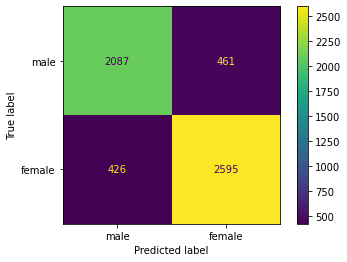

In [100]:
from sklearn import metrics
print(metrics.confusion_matrix(y, y_pred))
metrics.plot_confusion_matrix(model, X_scale, y, display_labels=['male', 'female'], values_format='d')

In [101]:
print(metrics.accuracy_score(y, y_pred))   # accuracy
print(metrics.precision_score(y, y_pred))  # precision
print(metrics.recall_score(y, y_pred))     # recall
print(metrics.f1_score(y, y_pred))

0.8407254444244927
0.8491492146596858
0.858987090367428
0.8540398222807307


c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


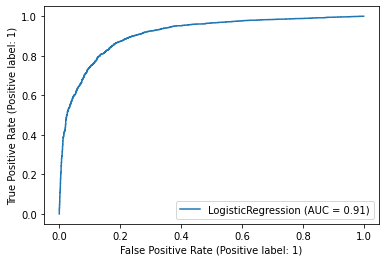

In [102]:
metrics.plot_roc_curve(model, X_scale, y)

## K nearest neighbours


In [112]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.1)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((5012, 23), (557, 23), (5012,), (557,))

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

errors = []
for k in range(1,80,2):
    model = KNeighborsClassifier(n_neighbors=k)
    errors.append({
        'k': k,
        'classification error': 1 - cross_val_score(model, X_train, y_train, cv=5).mean()
    })

results = pd.DataFrame(errors)
results.min()

k                       1.000000
classification error    0.098562
dtype: float64

In [135]:
#results
results.sort_values(by=['classification error'])

,k,classification error
0,1,0.098562
1,3,0.101352
2,5,0.111730
3,7,0.120110
4,9,0.122503
5,11,0.125497
6,13,0.129288
7,15,0.132480
8,17,0.139465
9,19,0.142057


<AxesSubplot:xlabel='k', ylabel='classification error'>

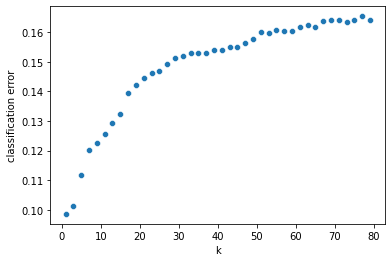

In [114]:
import seaborn as sns
sns.scatterplot(x='k', y='classification error', data=results)

In [115]:
kn_model = KNeighborsClassifier(n_neighbors=1)
kn_model.fit(X_train, y_train)
1 - kn_model.score(X_test,y_test)


0.08797127468581689

#### Good idea to use decision trees for age detection
#### Regression tree for age detection but do mapping as well 10 20 30 instead of using only classifers

# Decision trees


In [151]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
X = merged.loc[:, 'spectral_centroid':'MFCC_19']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = merged.gender_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [152]:
# Trying to find which tree may be the best to build
from sklearn.model_selection import GridSearchCV

# initial attempt
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

model = DecisionTreeClassifier(random_state=1)

gridSearch = GridSearchCV(model, param_grid, cv=5)
gridSearch.fit(X_train, y_train)

print(gridSearch.best_score_)
print(gridSearch.best_params_)

0.7596506538492521
{'max_depth': 20, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}


In [162]:
import dmba
from sklearn.ensemble import GradientBoostingClassifier

model_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.12)
model_boost.fit(X_train, y_train)

dmba.classificationSummary(y_test, model_boost.predict(X_test))


Confusion Matrix (Accuracy 0.8636)

       Prediction
Actual    0    1
     0  853  148
     1  156 1071


In [154]:
# Testing the outcome

dmba.classificationSummary(y_train, model.predict(X_train))
dmba.classificationSummary(y_test, model.predict(X_test))

Confusion Matrix (Accuracy 0.9419)

       Prediction
Actual    0    1
     0 1443  104
     1   90 1704
Confusion Matrix (Accuracy 0.8613)

       Prediction
Actual    0    1
     0  847  154
     1  155 1072


In [166]:
importances = model_boost.feature_importances_

result = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
result.sort_values('Importance', ascending=False)

,Feature,Importance
18,MFCC_15,0.267434
21,MFCC_18,0.137412
11,MFCC_8,0.082078
17,MFCC_14,0.063874
6,MFCC_3,0.063338
4,MFCC_1,0.049986
7,MFCC_4,0.046564
19,MFCC_16,0.036114
13,MFCC_10,0.028465
20,MFCC_17,0.027845


In [ ]:
import pickle
pickle.dump(model, open("LogisticRegression.model", "wb"))
pickle.dump(kn_model, open("KNeighborsClassifier.model", "wb"))

## Testing on locally recorded files - this should be built into a React dashboard

In [165]:
# Testing on new files
test_file = import_mp3file("./", "Recording_Anna_again.m4a")
test_frame = pd.DataFrame(test_file, index=[0])
X = test_frame.loc[:, 'spectral_centroid':'MFCC_19']
TEST = scaler.transform(X)

predicted_logistic = kn_model.predict(TEST)
print(f'Predicted for logistic regression: {predicted_logistic}')

k_predicted = model.predict(TEST)
print( (f'Predicted for K-nearest neigbours: {k_predicted}'))

boosted_tree = model_boost.predict(TEST)
print(f'Predicted for boosted tree: {boosted_tree}')

c:\users\asemjen\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Predicted for logistic regression: [1]
Predicted for K-nearest neigbours: [0]
Predicted for boosted tree: [0]
